<a href="https://colab.research.google.com/github/ragalaa/Machine-Learning-Basics/blob/master/Statistics_Anova_Test(F_score).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""

"" ANOVA test:
When you are dealing with data which are presented to you in different groups or sub-populations, 
you might be interested in knowing whether they arise from the same population, or they represent different populations (with different parameters).
As you can see, there are three different footpaths. Now the question is: are those three footpaths belonging to the same species of animals? Well, 
we can guess that two of them (orange and black) actually do, 
since they belong to birds, while the third one (in blue) is more likely to belong to a dog.
The answer to this problem is what the (One-way) ANalysis Of VAriance is meant for. 
It basically decomposes the variances within each group and among groups, 
relying on the Null Hypothesis that groups/samples have been drawn from the same population, hence their means are equivalent


The ANOVA produces an F-statistic (explained later on): for high values of F (generally higher than 3.68, which corresponds to a significance level of 5%) 
we can reject with sufficient confidence the Null, concluding that groups are not arising from the same population.

""''

As a case study, imagine a bunch of students from different colleges taking the same exam. You want to see if one college outperforms the other,
hence your null hypothesis is that the means of GPAs in each group are equivalent to those of the other groups. 
To keep it simple, we will consider 3 groups (college ‘A’, ‘B’, ‘C’) with 6 students each.
"""

In [4]:
import pandas as pd
import numpy as np

a=[25,25,27,30,23,20]
b=[30,30,21,24,26,28]
c=[18,30,29,29,24,26]
list_of_tuples = list(zip(a, b,c))
df = pd.DataFrame(list_of_tuples, columns = ['A', 'B', 'C'])
df



,A,B,C
0,25,30,18
1,25,30,30
2,27,21,29
3,30,24,29
4,23,26,24
5,20,28,26


In [6]:
m1 = np.mean(a)
m2 = np.mean(b)
m3 = np.mean(c)

print(' Average mark for college A: {}'.format(m1))
print(' Average mark for college B: {}'.format(m2))
print(' Average mark for college C: {}'.format(m3))

 Average mark for college A: 25.0
 Average mark for college B: 26.5
 Average mark for college C: 26.0


In [7]:
### compute the overall mean (k is the number of groups, hence in our case k=3):

M = (m1+m2+m3) / 3
print( 'Overall mean of all values:{}'.format(M))

Overall mean of all values:25.833333333333332


In [10]:
##compute the ‘between-group’ sum of squared differences (where n is the number of observations per group/college, hence in our case n=6):

SSb=6*((m1-M)**2+(m2-M)**2+(m3-M)**2)
print('Between-groups Sum of Squared Differences: {}'.format(SSb))


Between-groups Sum of Squared Differences: 6.999999999999999


In [11]:
###With those results, we can already compute one of the components of our F-score, which is the between-group mean square value (MSb). 
### Indeed, knowing that the between-group degrees of freedom are k-1 (that means, one less than the number of groups), we can compute the MSb as:
###  MSb = SSb /df( degree of freedom

MSb=SSb/2
print('Between-groups Mean Square value: {}'.format(MSb))

Between-groups Mean Square value: 3.4999999999999996


In [18]:
### calculate the “within-group” sum of squares.

## SSW = Ei Ej(Yij - Y-J)^2

err_a=list(a-m1)
err_b=list(b-m2)
err_c=list(c-m3)
err=err_a+err_b+err_c
ssw=[]
for i in err:
    ssw.append(i**2)
    

SSw=np.sum(ssw)

print('Within-group Sum of Squared Differences: {}'.format(SSw))

Within-group Sum of Squared Differences: 223.5


In [20]:
###Again, knowing that there are k(n-1) within-group degrees of freedom (hence in our case 15), we can compute the within-group mean square value:
### MSb = SSb /df( degree of freedom
MSw=SSw/15
print('Within-group Mean Square value: {}'.format(MSw))

Within-group Mean Square value: 14.9


In [21]:
##compute the F-score:
## F = MSb /MSw

F=MSb/MSw 
print('F-score: {}'.format(F)) 

F-score: 0.23489932885906037


In [22]:
### let's double cehck with SCIpy Python library

import scipy.stats as stats 
stats.f_oneway(a,b,c) 

F_onewayResult(statistic=0.2348993288590604, pvalue=0.793504662732833)

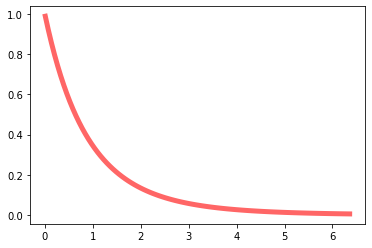

In [23]:
from scipy.stats import f
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
dfn, dfd = 2,15
x = np.linspace(f.ppf(0.01, dfn, dfd),f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd),'r-', lw=5, alpha=0.6, label='f pdf')

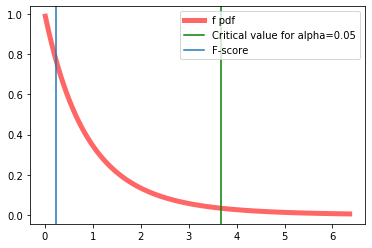

In [42]:
#### Let’s say we set alpha, which the level of significance, equal to 5%. The corresponding F-critical value is 3.68. Hence:
from scipy.stats import f
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
dfn, dfd = 2,15


x = np.linspace(f.ppf(0.01, dfn, dfd),f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd),'r-', lw=5, alpha=0.6, label='f pdf')
plt.axvline(x=3.68, label='Critical value for alpha=0.05', color='g')
plt.axvline(x=F, label='F-score')
plt.legend()

In [0]:
#####
"""
We do not reject the Null hypothesis about equality among means. 
We can conclude (with an error of 5%, or alternatively, with a confidence of 95%) that there is no significant difference between our three colleges A, B and C.


"""